### Construct Creative Validation Set

In [12]:
import sys
sys.path.append('/Users/broniy/Desktop/creative')

In [13]:
from utils import read_prompt, display_image_by_path, get_validation_image_paths, copy_validation_images
from validate_feature_extraction import load_ground_truth
from creative_features import analyze_image_with_gpt
from IPython.display import Markdown, display

In [8]:
get_validation_image_paths("../validation_ground_truth.yaml")

['842353b2-1806-40ab-9143-cc3b16d9b19d.jpg',
 '94033694-b60f-4a89-802a-65208e392b84.jpg',
 'd4a51fe6-556a-480b-992b-ce8904e4952e.jpg',
 '65a3270e-da12-4f8e-99f1-94bf1a2be3ec.jpg',
 'ad495f2f-1813-404c-a442-2edc3d1c113f.jpg',
 '6f7bf2b9-616d-4da9-9ee5-0942e76fffbb.jpg',
 '557de526-9345-46a7-b06e-418f2e93f1b4.jpg',
 '6f01a61a-0970-4fc0-af48-89380aea1269.jpg',
 '8e675df9-4da4-458a-9f7d-481c92a83e78.jpg',
 'adf15460-279f-48d3-baf6-eeca2c97c675.jpg',
 'b749e73a-de77-4e46-a64f-f4bd5b8cb9d6.jpg',
 '877fd485-7e03-4be2-a379-16b9cae03b83.jpg',
 'cdf1dbe0-b621-4ad2-830f-1130318be3b4.jpg',
 '9b31ccb6-cedd-4085-95ab-d4efe44aa8c7.jpg',
 'be2cf9c3-7ba4-495a-940e-6dd41a0518ce.jpg',
 '61a69586-61c6-4158-aee6-10d5bf610e5e.jpg',
 'd8a787e6-dd4e-4f0d-b6f7-3c14e32ec1d8.jpg']

In [9]:
copy_validation_images("../validation_ground_truth.yaml", "../data/all_images", "../data/validation")

Copied: 842353b2-1806-40ab-9143-cc3b16d9b19d.jpg
Copied: 94033694-b60f-4a89-802a-65208e392b84.jpg
Copied: d4a51fe6-556a-480b-992b-ce8904e4952e.jpg
Copied: 65a3270e-da12-4f8e-99f1-94bf1a2be3ec.jpg
Copied: ad495f2f-1813-404c-a442-2edc3d1c113f.jpg
Copied: 6f7bf2b9-616d-4da9-9ee5-0942e76fffbb.jpg
Copied: 557de526-9345-46a7-b06e-418f2e93f1b4.jpg
Copied: 6f01a61a-0970-4fc0-af48-89380aea1269.jpg
Copied: 8e675df9-4da4-458a-9f7d-481c92a83e78.jpg
Copied: adf15460-279f-48d3-baf6-eeca2c97c675.jpg
Copied: b749e73a-de77-4e46-a64f-f4bd5b8cb9d6.jpg
Copied: 877fd485-7e03-4be2-a379-16b9cae03b83.jpg
Copied: cdf1dbe0-b621-4ad2-830f-1130318be3b4.jpg
Copied: 9b31ccb6-cedd-4085-95ab-d4efe44aa8c7.jpg
Copied: be2cf9c3-7ba4-495a-940e-6dd41a0518ce.jpg
Copied: 61a69586-61c6-4158-aee6-10d5bf610e5e.jpg
Copied: d8a787e6-dd4e-4f0d-b6f7-3c14e32ec1d8.jpg

Summary:
Total validation images: 17
Successfully copied: 17
Missing files: 0


In [17]:
image_pth= "../data/validation/61a69586-61c6-4158-aee6-10d5bf610e5e.jpg"

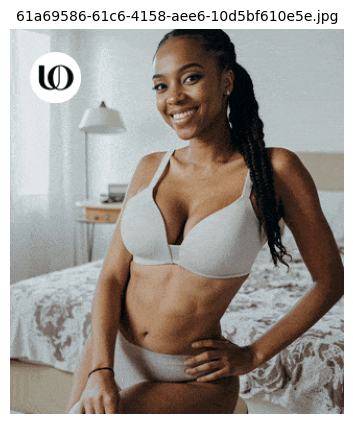

In [18]:
display_image_by_path(image_pth)

In [6]:
prompt = read_prompt("base_prompt.txt")
result = analyze_image_with_gpt("../images/842353b2-1806-40ab-9143-cc3b16d9b19d.jpg", prompt)
Markdown(result["response"])

In [7]:
Markdown(result["response"])

```json
{
  "Q1": "female",
  "Q2": "no",
  "Q3": "26-35",
  "Q4": "curvy",
  "Q5": "1",
  "Q6": "light",
  "Q7": "blonde, medium",
  "Q8": "yes",
  "Q9": "yes",
  "Q10": "smiling",
  "Q11": "standing",
  "Q12": "padded",
  "Q13": "unknown",
  "Q14": "black",
  "Q15": "unknown",
  "Q16": "no",
  "Q17": "yes",
  "Q18": "no",
  "Q19": "full-body",
  "Q20": "40",
  "Q21": "no",
  "Q22": "unknown",
  "Q23": "yes"
}
```

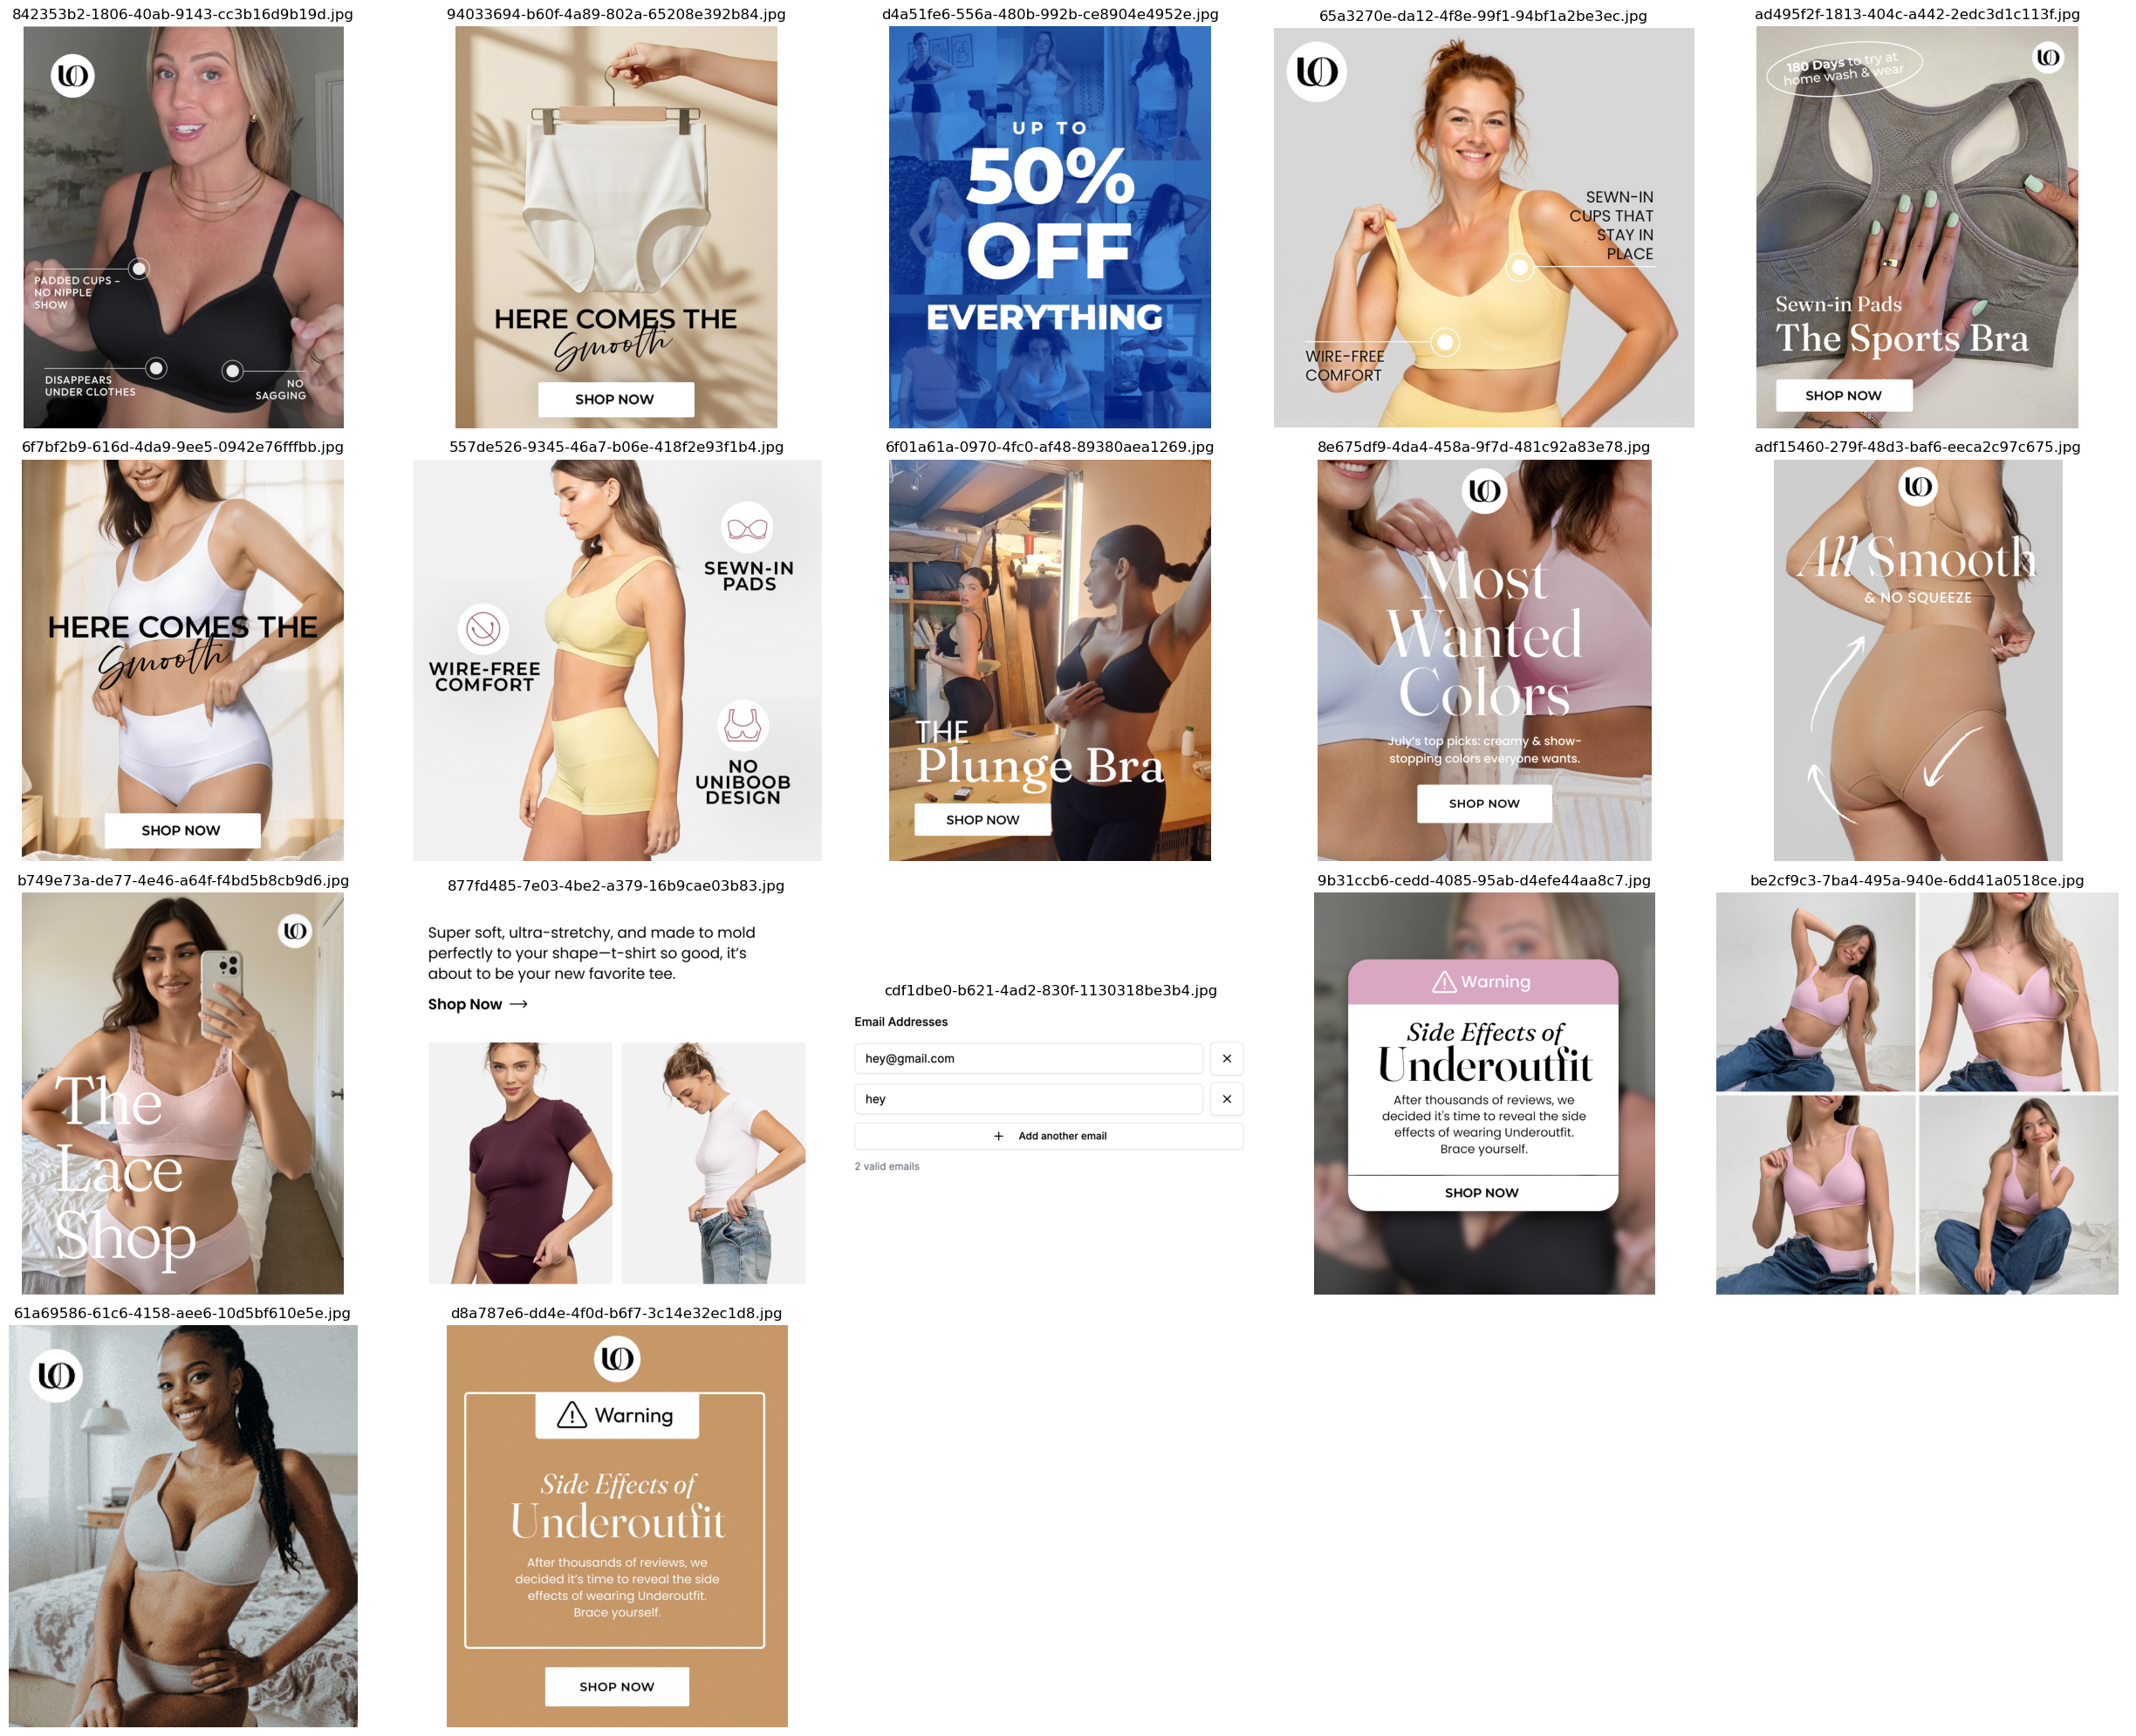

In [34]:

# Display all images listed in the YAML file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import yaml

# Load the YAML file with ground truth
with open("../validation_ground_truth.yaml", "r") as f:
    val_data = yaml.safe_load(f)


# Collect image paths
image_paths = []
for item in val_data.get("validation_images", []):
    filename = item.get("filename")
    if filename:
        image_path = f"../images/{filename}"
        image_paths.append(image_path)

# Display images in a grid
n_images = len(image_paths)
n_cols = 5
n_rows = math.ceil(n_images / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flatten axes for easy iteration, handle if only one row/col
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

for idx, (ax, img_path) in enumerate(zip(axes, image_paths)):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(img_path.split('/')[-1])
    ax.axis('off')

# Hide any unused subplots
for ax in axes[n_images:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
